In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get Dataset File Path
# path = os.path.abspath("")
# Alternatively
path = os.getcwd()
file = path + "/diabetes_prediction_dataset.csv"
file

'C:\\Users\\Giridhar\\Diabetes prediction/diabetes_prediction_dataset.csv'

In [3]:
# Load  Dataset
df = pd.read_csv(file)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df['blood_glucose_level']

0        140
1         80
2        158
3        155
4        155
        ... 
99995     90
99996    100
99997    155
99998    100
99999     90
Name: blood_glucose_level, Length: 100000, dtype: int64

In [9]:
c=0
for i in df['blood_glucose_level']:
   if(i<=120):
    c+=1
print("There are ",c,"with sugar level below 120")


There are  28144 with sugar level below 120


In [10]:
c=0
for i in df['blood_glucose_level']:
   if(i>=120):
    c+=1
print("There are ",c,"with sugar level above 120")

There are  71856 with sugar level above 120


In [11]:
for i in df['blood_glucose_level'].unique():
    print(i)

140
80
158
155
85
200
145
100
130
160
126
159
90
260
220
300
280
240


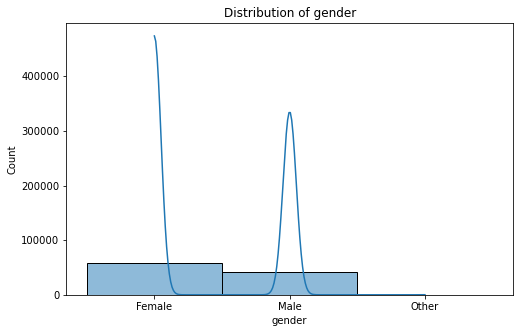

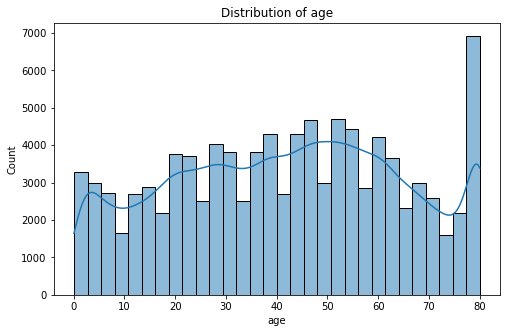

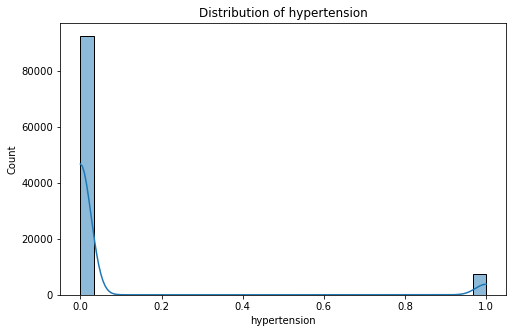

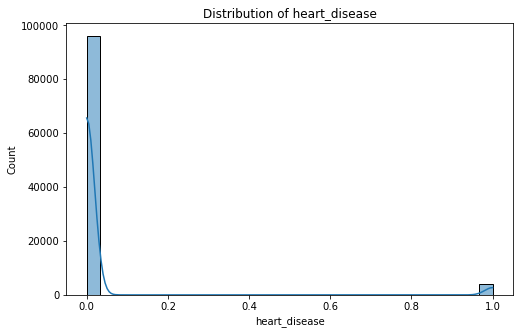

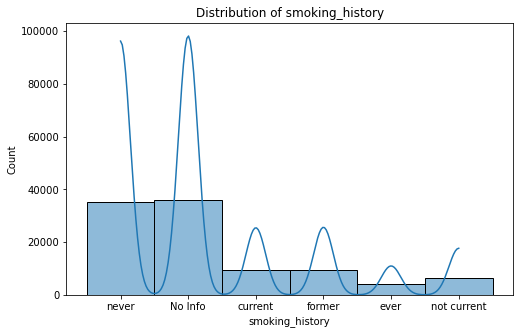

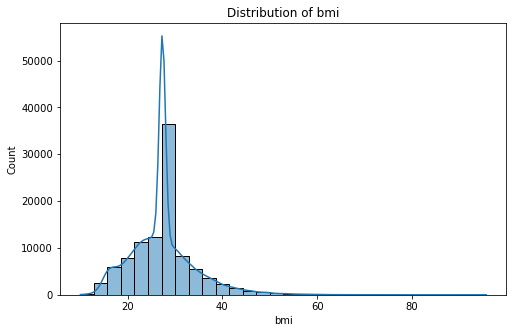

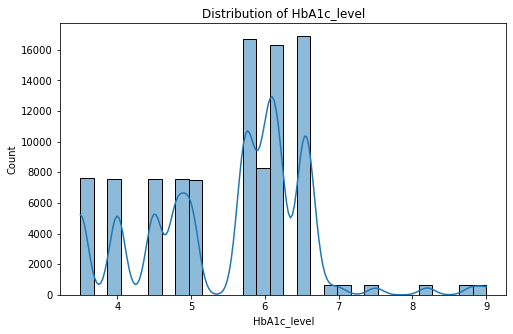

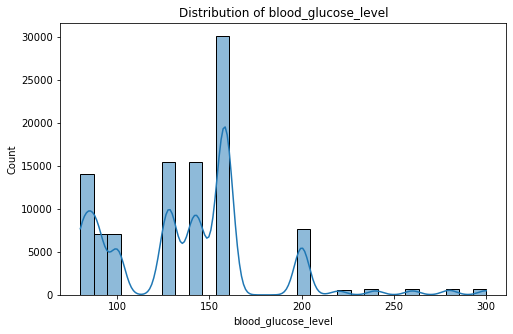

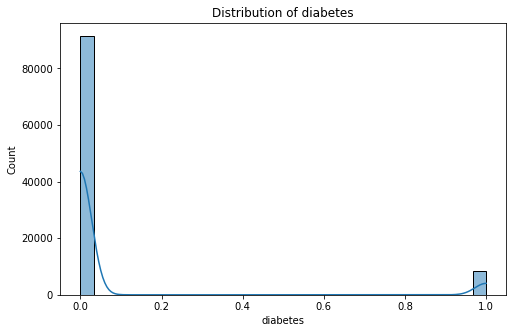

In [12]:
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])


label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


print(df[['smoking_history', 'smoking_history_encoded']])


Label Mapping: {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}
      smoking_history  smoking_history_encoded
0               never                        4
1             No Info                        0
2               never                        4
3             current                        1
4             current                        1
...               ...                      ...
99995         No Info                        0
99996         No Info                        0
99997          former                        3
99998           never                        4
99999         current                        1

[100000 rows x 2 columns]


In [14]:
label_encoder = LabelEncoder()


df['gender_encoded'] = label_encoder.fit_transform(df['gender'])


label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


print(df[['gender', 'gender_encoded']])

Label Mapping: {'Female': 0, 'Male': 1, 'Other': 2}
       gender  gender_encoded
0      Female               0
1      Female               0
2        Male               1
3      Female               0
4        Male               1
...       ...             ...
99995  Female               0
99996  Female               0
99997    Male               1
99998  Female               0
99999  Female               0

[100000 rows x 2 columns]


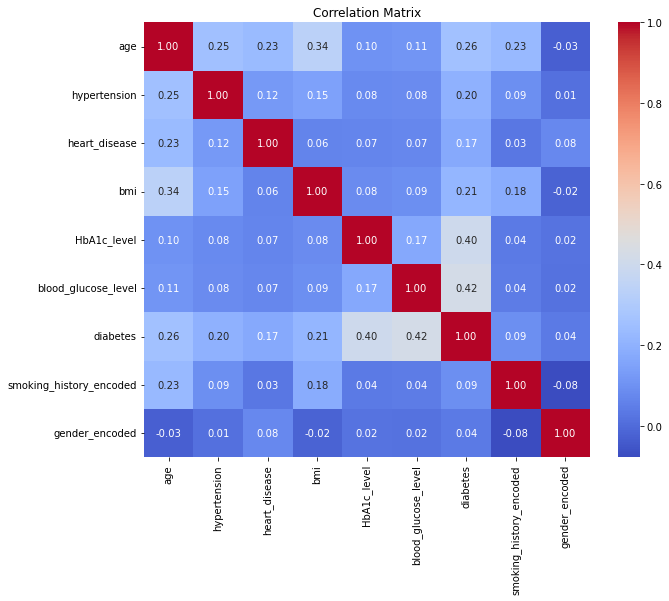

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
print(df['diabetes'])

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [17]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [18]:
columns_drop = ['gender', 'smoking_history']


df.drop(columns=columns_drop, inplace=True)

In [19]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,0,4,0
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,4,1
3,36.0,0,0,23.45,5.0,155,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,1
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,3,1
99998,24.0,0,0,35.42,4.0,100,0,4,0


In [43]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = 8
selector = SelectKBest(chi2, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]

import numpy as np

# Assuming X_train is a DataFrame
original_feature_names = np.array(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_encoded', 'gender_encoded'])  # Replace with your actual feature names

# Manually select 8 features
selected_features = original_feature_names[:8]



In [46]:
print(selected_features)


['age' 'hypertension' 'heart_disease' 'bmi' 'HbA1c_level'
 'blood_glucose_level' 'smoking_history_encoded' 'gender_encoded']


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Assuming X_train and y_train are your training data
# Assuming k_best is the number of features to select

# Create a SelectKBest object
selector = SelectKBest(chi2, k=k_best)

# Fit the selector to your training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Create a DecisionTreeClassifier object
dtr = DecisionTreeClassifier(random_state=42)

# Now you can use X_train_selected for training your model
dtr.fit(X_train_selected, y_train)


DecisionTreeClassifier(random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=42)
dtr.fit(X_train_selected,y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
y_pred=dtr.predict(X_test_selected)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9525


In [64]:
import pickle
import numpy as np

# Assuming X_train is a DataFrame
original_feature_names = np.array(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_encoded', 'gender_encoded'])

# Manually select 8 features
selected_features = original_feature_names[:8]

# Save selected feature names to a pickle file
with open('features.pkl', 'wb') as file:
    pickle.dump(selected_features, file)

print("Selected feature names saved to 'selected_features.pkl' successfully.")


Selected feature names saved to 'selected_features.pkl' successfully.


In [65]:
# Import necessary libraries
import pickle
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train_selected and y_train are defined
# and used for training the model
# Define and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Save the trained model
with open("features.pkl", "wb") as file:
    pickle.dump(model, file)


In [66]:
# import pickle

# # Assuming 'model' is your trained model object
# with open("selected_features.pkl", "wb") as file:
#     pickle.dump(model, file)


In [67]:
import pickle
pickle.dump(model, open("features.pkl", "wb"))

In [68]:
# import os

# # Get the current working directory
# cwd = os.getcwd()
# print("Current working directory:", cwd)

# # List the files in the current directory
# files = os.listdir(cwd)
# print("Files in the current directory:", files)


In [69]:
import pickle

# Load the model from the file
model = pickle.load(open("features.pkl", "rb"))


In [71]:
import pickle
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load the trained model
model = pickle.load(open("features.pkl", "rb"))

# Prepare the input features as a 2D array
features = np.array([[age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, smoking_history_encoded, gender_encoded]])

# Assuming these are your feature values, replace them with actual values
age = 35
hypertension = 1
heart_disease = 0
bmi = 25.5
HbA1c_level = 1
blood_glucose_level = 120
smoking_history_encoded = 0
gender_encoded = 1

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the input features
features_encoded = encoder.fit_transform(features).toarray()

# Make predictions using the encoded features
y_pred = model.predict(features_encoded)

print(f"Predicted value: {round(y_pred[0])}")


Predicted value: 0
